In [1]:
include("../src/GaPSE.jl");

In [30]:
using DelimitedFiles, Plots, Dierckx, SpecialFunctions, Printf, LaTeXStrings

In [3]:
FILE_F_MAP = "../data/F_REFERENCE.txt"
#FILE_PS = "../data/WideA_ZA_pk.dat"
FILE_PS = "file_pk.txt"
FILE_BACKGROUND = "../data/WideA_ZA_background.dat"
#FILE_IS = "tab_xi.txt"

z_min = 0.05
z_max = 0.20
θ_max = π / 2.0
params = GaPSE.CosmoParams(z_min, z_max, θ_max;
  k_min = 1e-8, k_max = 10.0,
  Ω_b = 0.0489, Ω_cdm = 0.251020, h_0 = 0.70,
    N = 1024, fit_min = 0.05, fit_max= 0.5, con=true)

cosmo = GaPSE.Cosmology(params, FILE_BACKGROUND, FILE_PS, FILE_F_MAP; expand=false)

GaPSE.parameters_used(stdout, cosmo)

I take the input power spectrum as it is,without expanding.
# The following parameters were used for this computation: 
# CLASS Power Spectrum input file : "file_pk.txt"
# F window function input file : "../data/F_REFERENCE.txt"
# CLASS Background input file: "../data/WideA_ZA_background.dat"
# 	 z_min = 0.05 	 z_max = 0.2
# 	 k_min = 1.0e-8 	 k_max = 10.0
# 	 h_0 = 0.7 	 Ω_b = 0.0489 	 Ω_cdm = 0.25102 	 Ω_M0 = 0.29992
# 	 comoving s_min = 148.19200014818588 Mpc/h_0
# 	 comoving s_max = 571.7022420258767 Mpc/h_0
# 	 comoving s_eff = 435.3747095691862 Mpc/h_0
# 	 comoving z_eff = 0.15045636096027523 
# 	 Volume of the survey V_survey = 3.845366167993746e8
# 	 σ_0 = 15.593462966741178
# 	 σ_1 = 15.074895881392285
# 	 σ_2 = 100.85852368830221
# 	 σ_3 = 3735.1227501923527
# 


In [4]:
#=
GaPSE.print_map_ξ_multipole(cosmo, 
    "AutoCorrelationTests/xi_lensing_L0_1.txt", 
    "auto_lensing"; use_windows = false, 
    N_χs = 50, Δχ_min = 1e-3, enhancer=1e10, μ_atol=1e-5, μ_rtol=1e-1) 

GaPSE.print_map_int_on_mu(cosmo, 
    "AutoCorrelationTests/xi_lensing_L0_2.txt", 
    "auto_lensing"; use_windows = false, 
    N_χs = 50, Δχ_min = 1e-4, enhancer=1e10,  μ_atol=1e-5, μ_rtol=1e-1) 
GaPSE.print_map_int_on_mu(cosmo, 
    "AutoCorrelationTests/xi_lensing_L0_3.txt", 
    "auto_lensing"; use_windows = false, 
    N_χs = 50, Δχ_min = 1e-5, enhancer=1e10, μ_atol=1e-5, μ_rtol=1e-1)
=#

In [5]:
#=
my_tab_1 = readdlm("AutoCorrelationTests/xi_lesnsing_L0_1.txt", comments=true);
my_tab_2 = readdlm("AutoCorrelationTests/xi_lensing_L0_2.txt", comments=true);
my_tab_3 = readdlm("AutoCorrelationTests/xi_lensing_L0_3.txt", comments=true);

ss_1 = convert(Vector{Float64}, my_tab_1[:,1]);
xis_1 = convert(Vector{Float64}, my_tab_1[:,2]); 
ss_2 = convert(Vector{Float64}, my_tab_2[:,1]);
xis_2 = convert(Vector{Float64}, my_tab_2[:,2]); 
ss_3 = convert(Vector{Float64}, my_tab_3[:,1]);
xis_3 = convert(Vector{Float64}, my_tab_3[:,2]); 
=#

In [6]:
#=
s1 = cosmo.s_eff
s2 = cosmo.s_eff + 0.0010
y = 0.999


χ1s = range(0.0, s1, length=100)
χ2s = range(0.0, s2, length=100)
mesh_χ1s = [χ1 for χ1 in χ1s for χ2 in χ2s]
mesh_χ2s = [χ2 for χ1 in χ1s for χ2 in χ2s]
zs = [GaPSE.integrand_ξ_lensing(χ1, χ2, s1, s2, y, cosmo;Δχ_min=0.01) 
    for (χ1,χ2) in zip(mesh_χ1s, mesh_χ2s)]
#zs = [χ1+χ2 for (χ1,χ2) in zip(mesh_χ1s, mesh_χ2s)]
plot(mesh_χ1s, mesh_χ2s, zs, st=:surface, size=(400, 300))
=#

In [14]:
GaPSE.print_map_ξ_multipole(cosmo, 
    "AutoCorrelationTests/xi_lensing_L0.txt", 
    "auto_lensing"; use_windows = false, 
    N_χs = 50, N_μs = 30, Δχ_min = 1e-4, enhancer=1e10)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:00



time needed for map_integral_on_mu for auto_lensing [in s] = 60.14728 


In [15]:
my_table = readdlm("AutoCorrelationTests/xi_lensing_L0.txt", comments=true);
my_ss = convert(Vector{Float64}, my_table[:,1]);
my_lensings = convert(Vector{Float64}, my_table[:,2]);
mattia_table = readdlm("/Users/matteofoglieni/Dropbox/GR_effects/Mattia_Output/Monopoles_without_window/xi_lensing_L0.txt")
mattia_ss = convert(Vector{Float64}, mattia_table[2:end, 1]);
mattia_lensings = convert(Vector{Float64}, mattia_table[2:end, 2]);
casto_table = readdlm("tab_kappa_terms.dat")
casto_ss = convert(Vector{Float64}, casto_table[3:end, 1]);
casto_lensings = convert(Vector{Float64}, casto_table[3:end, 2]);

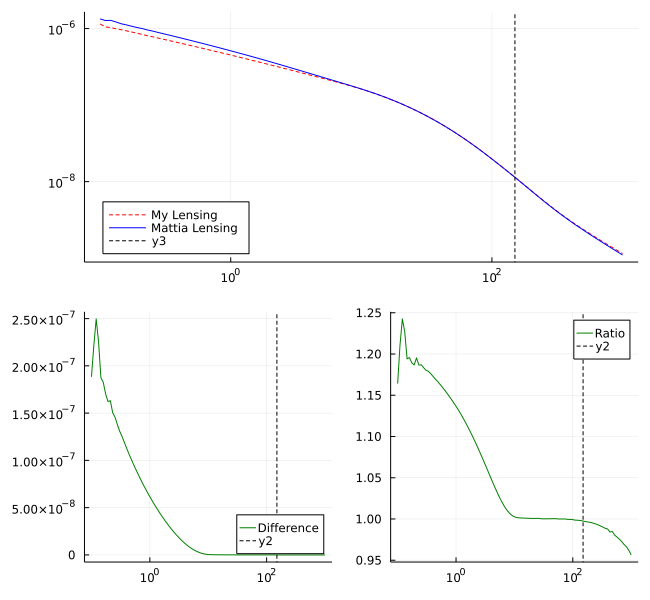

In [31]:
my_xs = my_ss
my_ys = my_lensings
xs = mattia_ss
ys = mattia_lensings
spline = Spline1D(xs, ys)
K_VLINE = 150

p1 = plot([my_xs, xs], [my_ys,  ys], xaxis=:log, yaxis=:log, 
    
    lc=[:red :blue], 
    label=["My Lensing" "Mattia Lensing"], ls=[:dash :solid], legend=:bottomleft)
vline!(p1,[K_VLINE], lc=:black, ls=:dash)


p2 = plot(my_xs, spline.(my_xs) .- my_ys, 
    xaxis=:log,label="Difference", lc=:green, legend=:bottomright)
vline!(p2,[K_VLINE], lc=:black, ls=:dash)

p3 = plot(my_xs, spline.(my_xs) ./ my_ys, label="Ratio", lc=:green, xaxis=:log,
    #ylim=(0.99,1.05)
)
vline!(p3,[K_VLINE], lc=:black, ls=:dash)

plot(p1, p2, p3, size=(650, 600), layout= @layout [ x ; y z ] )

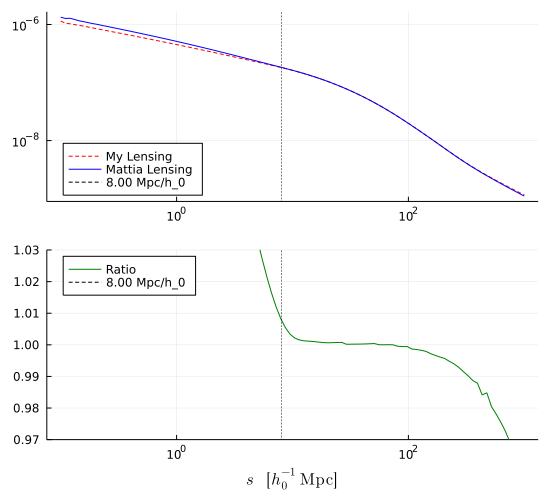

In [44]:
my_xs = my_ss
my_ys = my_lensings
xs = mattia_ss
ys = mattia_lensings
spline = Spline1D(xs, ys)

S_VLIM = 8
S_VLIM_F = @sprintf("%.2f", S_VLIM)

p1 = plot([my_xs, xs], [my_ys,  ys], xaxis=:log, yaxis=:log, lc=[:red :blue], 
    label=["My Lensing" "Mattia Lensing"], ls=[:dash :solid], legend=:bottomleft)
vline!(p1, [S_VLIM], label="$S_VLIM_F Mpc/h_0", lc=:black, lw=0.5, ls=:dash)

p2 = plot(my_xs, spline.(my_xs) ./ my_ys, label="Ratio", lc=:green, xaxis=:log,
    ylim=(0.97,1.03), legend=:topleft, 
    xlabel=L"$s \quad [h_0^{-1}\,\mathrm{Mpc}]$")
vline!(p2, [S_VLIM], label="$S_VLIM_F Mpc/h_0", lc=:black, lw=0.5, ls=:dash)

P = plot(p1, p2, size=(550, 500), layout= @layout [ x ; z ] )
savefig(P, "xi_AutoLensing_L0.pdf")
display(P)

In [48]:
xis = [1.7117484899211954e-6, 1.7107428661927894e-6, 1.609064906452889e-6, 1.5163499255908177e-6, 1.497182257198055e-6, 1.4466081925111856e-6, 1.3855805134683682e-6, 1.3251522032186552e-6, 1.2717528776225456e-6, 1.2281234454704037e-6, 1.1798284232863511e-6, 1.1315823708699262e-6, 1.087408683926583e-6, 1.0434369593083212e-6, 1.000917361478718e-6, 9.60364888716332e-7, 9.206828038113539e-7, 8.822473869672534e-7, 8.452750735642878e-7, 8.093858279454754e-7, 7.745869828956846e-7, 7.409622993954048e-7, 7.084258183596716e-7, 6.769292711862385e-7, 6.464630748913811e-7, 6.164163564484932e-7, 5.879383284449563e-7, 5.60398325312523e-7, 5.337799684796369e-7, 5.080653545162718e-7, 4.832377072661405e-7, 4.592783814763736e-7, 4.3617694256321275e-7, 4.139223987915343e-7, 3.925075138962259e-7, 3.7192747416099155e-7, 3.5218046057593745e-7, 3.3326642606657353e-7, 3.151874859815212e-7, 2.979463593581672e-7, 2.815453008192233e-7, 2.6598450657574284e-7, 2.512599754644355e-7, 2.3736126474758594e-7, 2.2426926028229654e-7, 2.1195446334516455e-7, 2.003762415429821e-7, 1.8948354485901396e-7, 1.792171345576105e-7, 1.6951286322023457e-7, 1.603049196121694e-7, 1.5152789161623074e-7, 1.4311746267305278e-7, 1.350107533384163e-7, 1.2714696115179626e-7, 1.1947575207888852e-7, 1.1197654440540145e-7, 1.0465652788633383e-7, 9.753383682040173e-8, 9.062921109784563e-8, 8.396169005864202e-8, 7.759581481344574e-8, 7.143696630954653e-8, 6.554612111624613e-8, 5.993671786000605e-8, 5.462102496586217e-8, 4.9606166232316806e-8, 4.489502196489385e-8, 4.0504854092453624e-8, 3.6405825856597824e-8, 3.261473739478015e-8, 2.911746014584097e-8, 2.593039529169604e-8, 2.3010497962030768e-8, 2.0369017933072947e-8, 1.8003279280661646e-8, 1.588622103540523e-8, 1.3999203971954333e-8, 1.2320192839398769e-8, 1.0837319338285647e-8, 9.515194584190099e-9, 8.34760099397805e-9, 7.323991247542836e-9, 6.4274346352421316e-9, 5.650334010931113e-9, 4.9806900578789505e-9, 4.404967215227362e-9, 3.908250596712529e-9, 3.4820364210155978e-9, 3.1122598629660955e-9, 2.789419469247166e-9, 2.5114388580044727e-9, 2.26710562060553e-9, 2.0504245368644954e-9, 1.856962349581533e-9, 1.6850149543331036e-9, 1.5325467118670944e-9, 1.39592704844874e-9, 1.2737105053369115e-9, 1.1650806176655517e-9];

In [49]:
calc_xis = [1.748379579512144e-6, 1.7020858241198867e-6, 1.5949926557675445e-6, 1.4923092332266468e-6, 1.4853733531758032e-6, 1.438467220122199e-6, 1.3818024152325284e-6, 1.3225952363300088e-6, 1.2718061747030774e-6, 1.22776186489069e-6, 1.1797560233784998e-6, 1.1319025209505208e-6, 1.0864006226272798e-6, 1.0432420097342252e-6, 1.0007984173564517e-6, 9.604923862513285e-7, 9.20658790983054e-7, 8.822420035527544e-7, 8.452504479455403e-7, 8.093922153725055e-7, 7.745892051086235e-7, 7.409594847927499e-7, 7.084177637143879e-7, 6.769239707608304e-7, 6.464621832637106e-7, 6.164158835015937e-7, 5.879387038451675e-7, 5.603989466812507e-7, 5.337797776266397e-7, 5.080649842225544e-7, 4.832373647051999e-7, 4.5927842173281035e-7, 4.3617695572266574e-7, 4.1392242307552785e-7, 3.925074575103107e-7, 3.7192744730970396e-7, 3.5218047523622854e-7, 3.332664117595059e-7, 3.1518747743550364e-7, 2.979463569736522e-7, 2.81545298990092e-7, 2.659845063363359e-7, 2.5125997704742824e-7, 2.3736126382256895e-7, 2.2426926011762971e-7, 2.1195446324623767e-7, 2.0037624155990225e-7, 1.8948354479404978e-7, 1.7921713452852004e-7, 1.69512863140415e-7, 1.6030491959518276e-7, 1.5152789161093864e-7, 1.4311746268287916e-7, 1.3501075332087312e-7, 1.271469611378973e-7, 1.194757519055325e-7, 1.1197654442527946e-7, 1.0465652787271777e-7, 9.753383685396336e-8, 9.062921099706604e-8, 8.396169004050784e-8, 7.759581486199734e-8, 7.143696630050821e-8, 6.55461211163124e-8, 5.993671794625973e-8, 5.462102494586417e-8, 4.960616617423165e-8, 4.4895021964756904e-8, 4.050485410520523e-8, 3.6405825845733264e-8, 3.26147373942226e-8, 2.911746014293462e-8, 2.5930395287108638e-8, 2.301049796094669e-8, 2.0369017934333365e-8, 1.800327928351025e-8, 1.5886221025928408e-8, 1.3999203967269986e-8, 1.2320192839038485e-8, 1.0837319335251864e-8, 9.515194584175082e-9, 8.347600993966255e-9, 7.323991247534994e-9, 6.4274346355591295e-9, 5.6503340104297614e-9, 4.980690057840382e-9, 4.4049672152390184e-9, 3.908250597351623e-9, 3.4820364210759323e-9, 3.1122598623504614e-9, 2.789419468362915e-9, 2.5114388579858244e-9, 2.2671056207715684e-9, 2.05042453645325e-9, 1.8569623495535538e-9, 1.6850149541152966e-9, 1.5325467105882051e-9, 1.3959270484554985e-9, 1.2737105053475797e-9, 1.1650806176007638e-9];

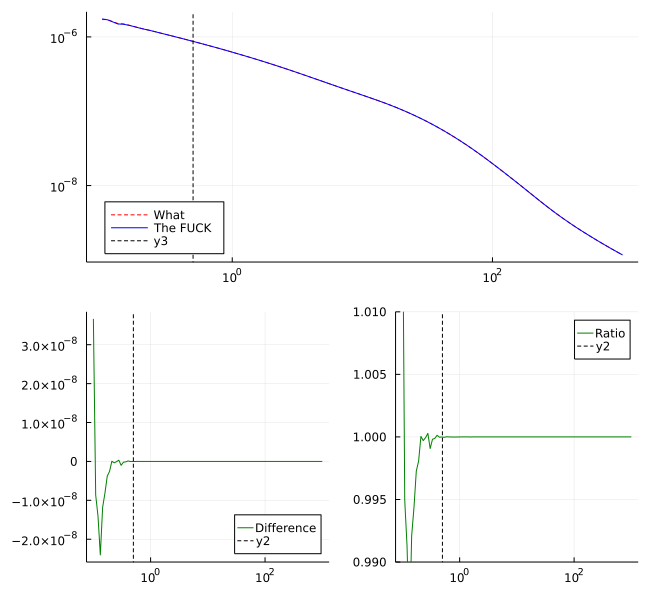

In [52]:
my_xs = my_ss
my_ys = xis
xs = my_ss
ys = calc_xis
spline = Spline1D(xs, ys)
K_VLINE = 0.5

p1 = plot([my_xs, xs], [my_ys,  ys], xaxis=:log, yaxis=:log, 
    
    lc=[:red :blue], 
    label=["What" "The FUCK"], ls=[:dash :solid], legend=:bottomleft)
vline!(p1,[K_VLINE], lc=:black, ls=:dash)


p2 = plot(my_xs, spline.(my_xs) .- my_ys, 
    xaxis=:log,label="Difference", lc=:green, legend=:bottomright)
vline!(p2,[K_VLINE], lc=:black, ls=:dash)

p3 = plot(my_xs, spline.(my_xs) ./ my_ys, label="Ratio", lc=:green, xaxis=:log,
    ylim=(0.99,1.01)
)
vline!(p3,[K_VLINE], lc=:black, ls=:dash)

plot(p1, p2, p3, size=(650, 600), layout= @layout [ x ; y z ] )